In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import os


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from tqdm import tqdm
from time import perf_counter
import category_encoders as ce

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

import jsonschema
import pickle
from jsonschema import validate

from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
traning_set_path = os.path.join(os.getcwd(), 'data', 'train_input_cv.json')
traning_set_path

'C:\\Users\\League\\Desktop\\test_technic\\data\\train_input_cv.json'

In [3]:
def build_data(path: str) -> pd.DataFrame():
    """
    :param path: string path of the training data
    :return: dataframe
    """
    df = pd.read_json(path)
    size = df.shape[0]
    training_set = []

    for idx in range(size):
        data = dict(df.iloc[idx])['data_train_assets']
        # pprint.pprint(data)
        id_ = {'id':data['id']}
        asset_infos = data['asset_infos']
        asset_scores = data['asset_scores']
        features = id_ | asset_infos | asset_scores
        training_set.append(features)
    return pd.DataFrame(training_set)

In [4]:
df = build_data(traning_set_path)

In [5]:
df

,id,target,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,score11,score12,score13,score14
0,6111,4147.073176,2017,9.411233,467.419808,mod1,0.177,Peri_Defense,0.1040,Single var8,YES,9320.0,9.779758,8.335872,4.128996,3.811154,0.500000,8.987232,1.011843,4.640702,5.857159,3.712108,9.289484,5.669272,5.694541,0.869852
1,6613,12559.435570,2017,9.704810,615.542919,mod1,0.036,Paris CBD,0.0220,Multi var8,NO,5145.0,9.084203,8.487501,2.709160,3.600302,0.500000,10.418841,4.214280,6.921059,3.718802,4.182584,16.372254,8.658624,8.307928,8.021983
2,6618,8133.090810,2017,11.356931,522.357525,mod1,0.077,Southern River Bend,0.1040,Multi var8,NO,6420.0,10.218019,9.507225,3.838474,3.917762,0.500000,12.667292,7.197379,7.526994,5.594892,4.333201,8.879714,4.864289,5.516426,1.335918
3,6671,5352.568018,2017,8.863876,470.040872,mod1,0.077,Southern River Bend,0.1040,Multi var8,NO,4021.0,7.944411,8.246740,1.930157,2.210433,0.500000,9.921754,3.484379,5.492302,4.951701,3.917995,10.150260,6.426254,5.454759,1.705770
4,6679,4700.734049,2017,11.631887,518.387511,mod1,0.073,Inner Rim_South,0.0760,Single var8,YES,70840.0,10.895956,9.180006,4.552482,4.937423,0.500000,12.478602,6.570211,5.639763,6.650744,5.529380,8.283226,4.727474,5.223538,0.643237
5,7954,6046.863190,2017,13.304534,690.168282,mod1,0.072,Neuilly_Levallois,0.1040,Single var8,NO,2646.0,15.000755,9.072522,6.136882,8.558884,5.949324,11.352969,3.943577,6.806328,4.128261,6.425585,14.781059,7.760393,7.985257,6.484984
6,8002,27475.336320,2021,17.133972,844.732900,mod1,0.036,Paris CBD,0.0690,Multi var8,NO,22300.0,18.023710,9.580588,9.491568,9.917414,7.838089,16.110296,8.453595,7.811680,9.130398,7.441309,16.613594,8.553706,7.080705,9.725730
7,8006,18400.000000,2021,17.679896,855.728884,mod1,0.036,Paris CBD,0.0100,Multi var8,NO,38000.0,17.851198,9.096526,8.937872,9.577782,9.355039,17.482807,8.752970,7.811680,10.119077,9.481036,16.237605,8.902151,7.080705,8.535072
8,8010,19367.201810,2021,16.815572,839.857366,mod1,0.036,Paris CBD,0.0480,Multi var8,NO,46966.0,17.378766,9.221837,8.857303,8.558884,9.355039,16.167596,7.700886,7.455671,8.940751,8.893831,16.830099,8.527848,7.581490,9.725730
9,8014,25041.886440,2020,17.598410,863.208655,mod1,0.036,Paris CBD,0.1430,Multi var8,NO,9669.0,17.608054,9.193455,9.594953,9.401716,7.698371,17.587314,8.887814,8.103190,9.702596,9.745545,16.735562,8.518489,7.394007,9.725730


In [6]:
scores = ['score1', 'score2', 'score3', 'score4',
       'score5', 'score6', 'score7', 'score8', 'score9', 'score10', 'score11',
       'score12', 'score13', 'score14']

In [7]:
df['min_scores'] = df[scores].min(axis=1)
df['max_scores'] = df[scores].max(axis=1)
df['avrg_scores'] = df[scores].mean(axis=1)

# Data visualization 

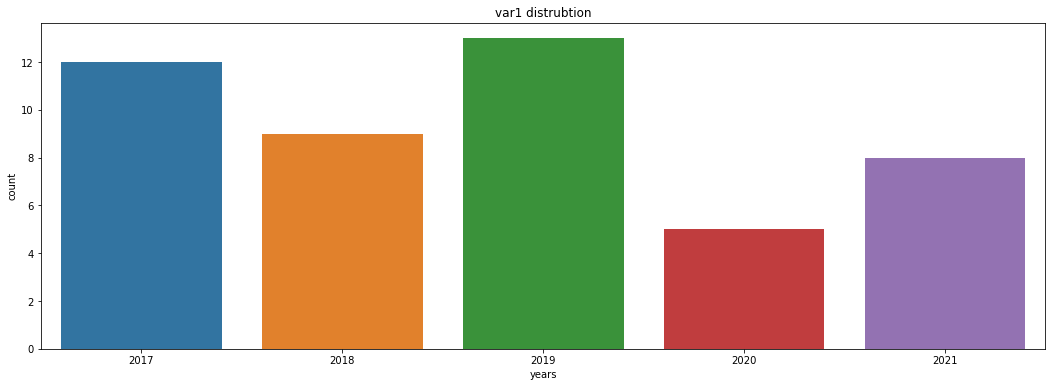

In [8]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df, x="var1")
ax.set_title('var1 distrubtion')
ax.set_xlabel('years')
plt.show()

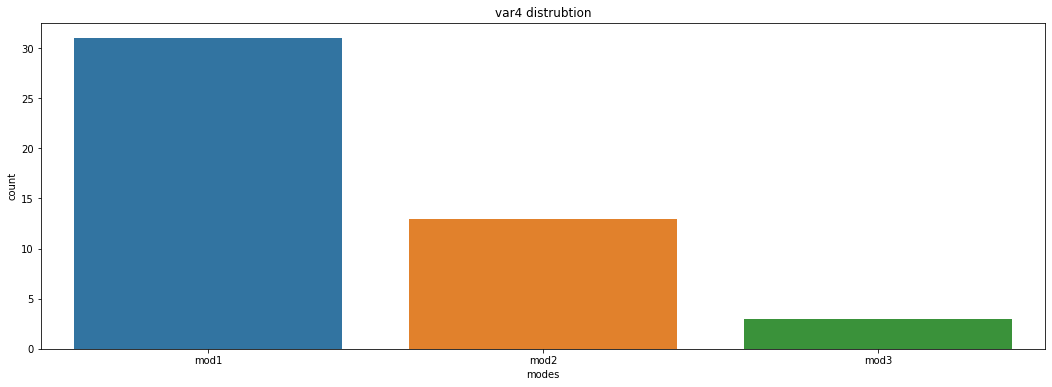

In [9]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df, x="var4")
ax.set_title('var4 distrubtion')
ax.set_xlabel('modes')
plt.show()

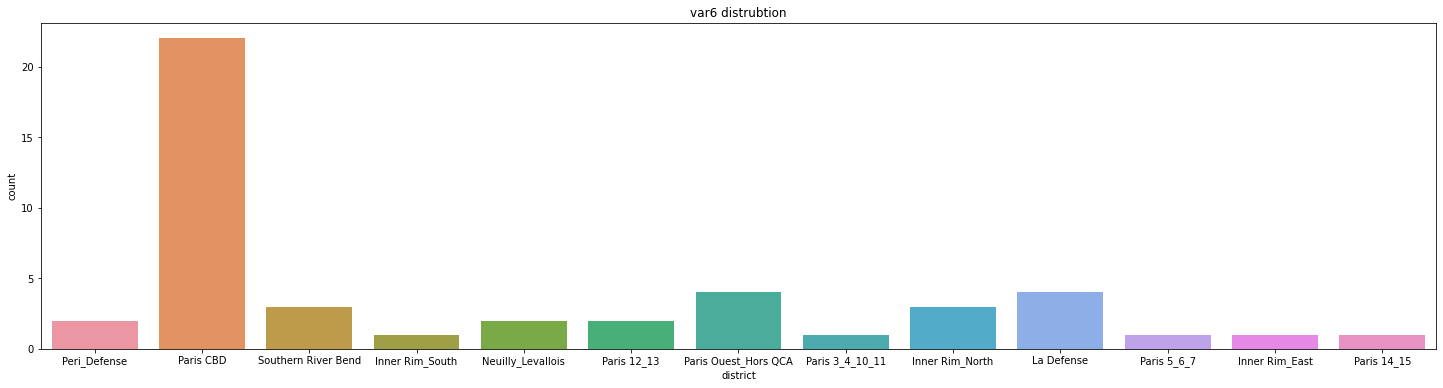

In [10]:
plt.figure(figsize=(25, 6))
ax = sns.countplot(data=df, x="var6")
ax.set_title('var6 distrubtion')
ax.set_xlabel('district')
plt.show()

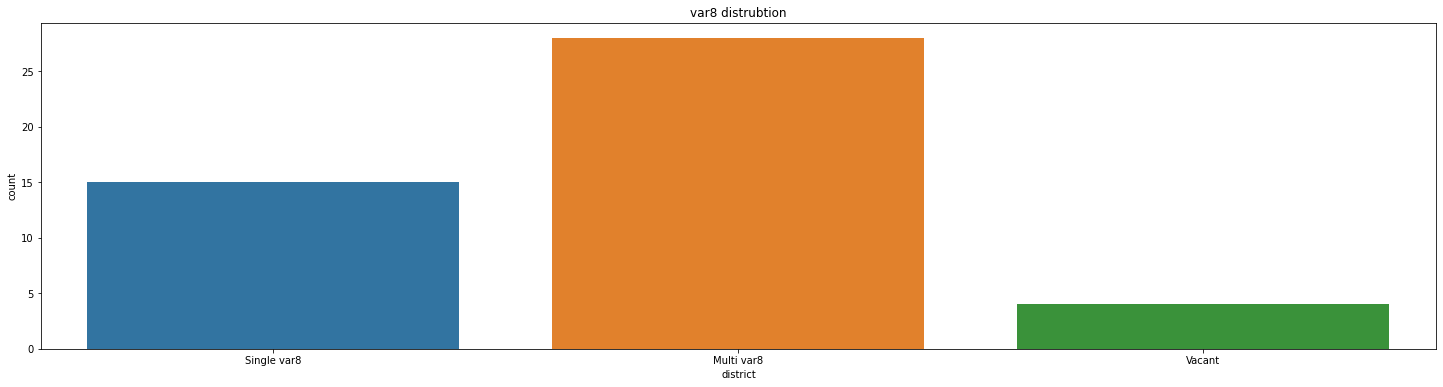

In [11]:
plt.figure(figsize=(25, 6))
ax = sns.countplot(data=df, x="var8")
ax.set_title('var8 distrubtion')
ax.set_xlabel('district')
plt.show()

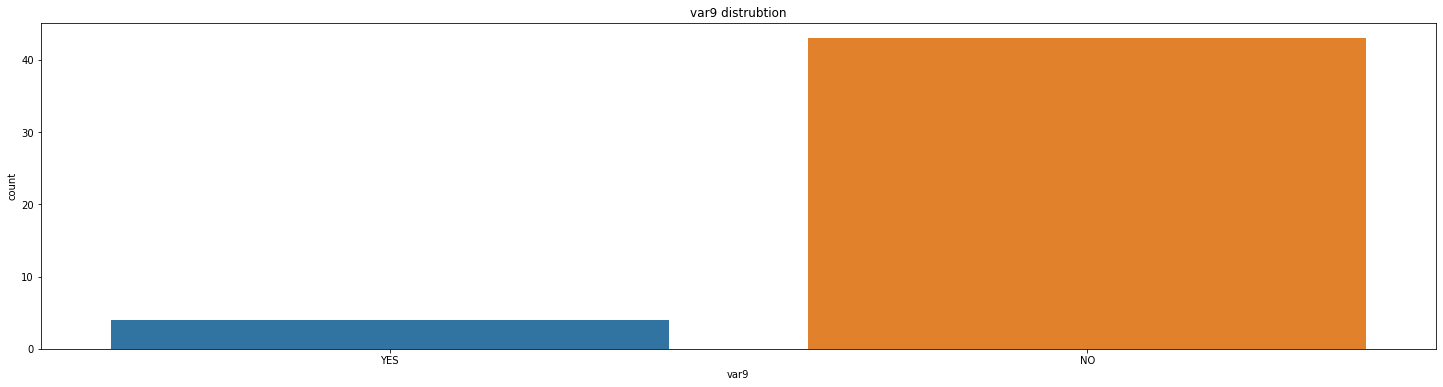

In [12]:
plt.figure(figsize=(25, 6))
ax = sns.countplot(data=df, x="var9")
ax.set_title('var9 distrubtion')
ax.set_xlabel('var9')
plt.show()

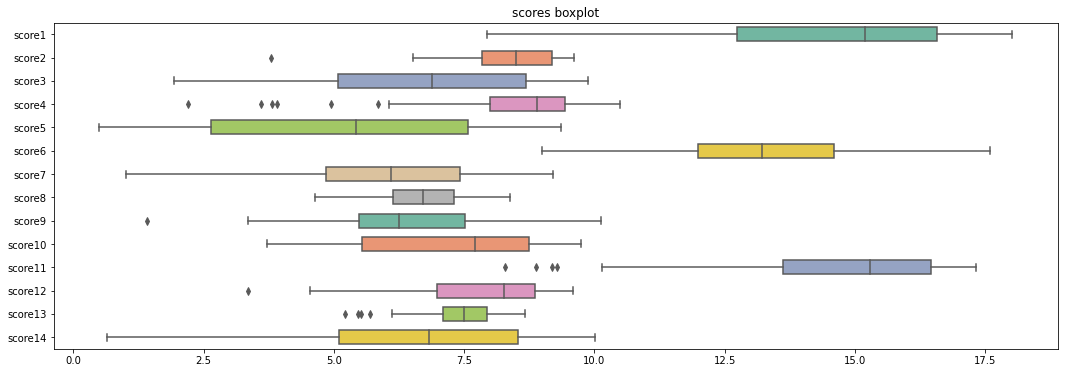

In [13]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=df[['score1', 'score2', 'score3', 'score4',
       'score5', 'score6', 'score7', 'score8', 'score9', 'score10', 'score11',
       'score12', 'score13', 'score14']], orient="h", palette="Set2", width=.6)
ax.set_title('scores boxplot')
#ax.set_xlabel
plt.show()

In [14]:
df.drop(scores, axis=1, inplace=True)

# Data preparation

In [15]:
def clean_trainData(df: pd.DataFrame(), save_encoder: bool) -> pd.DataFrame():
    """Cleaning, splitting the training data and dummies the cateogial variables"""
    
    # convert the boolean features 
    df.var9.replace('YES', 1, inplace=True)
    df.var9.replace('NO', 0, inplace=True)

    # split the data
    X = df.drop(['id', 'target'], axis=1)
    Y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.20,
                                                    random_state=0)


    # convert the categorical variables
    encoder = ce.cat_boost.CatBoostEncoder(random_state=0)
    x_train = encoder.fit_transform(X_train, y_train)
    x_test = encoder.transform(X_test)
    # save the encoder for later use
    if save_encoder:
        pickle.dump(encoder, open('encoder.sav', 'wb'))

    return x_train, x_test, y_train, y_test

In [16]:
x_train, x_test, y_train, y_test = clean_trainData(df, True)

In [17]:
print(f'the train set size is {x_train.shape}')
print(f'the train set size is {x_test.shape}')

the train set size is (37, 13)
the train set size is (10, 13)


# Model selection

In [18]:
models = [GaussianProcessRegressor(),
          LinearRegression(n_jobs=-1),
          RandomForestRegressor(n_jobs=-1),
          ExtraTreesRegressor(n_jobs=-1),
          DummyRegressor(),
          KNeighborsRegressor(n_jobs=-1),
          SVR(),]

In [19]:
# test plenty of models and return their scores
def models_tester(models, x_train, y_train, x_test, y_test):
    """
    :param models:
    :param x_train:
    :param y_train:
    :param x_test:
    :param y_test:
    :return:
    """
    model_information = []
    for model in tqdm(models):
        t = perf_counter()
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        model_information.append((model.__class__.__name__,
                                  predictions,
                                  perf_counter() - t))
        pass

    # scores
    models_MAE = list(map(lambda x: mean_absolute_error(y_test, x[1]), model_information))
    models_MSE = list(map(lambda x: mean_squared_error(y_test, x[1]), model_information))
    models_RMSE = list(map(lambda x: np.sqrt(mean_squared_error(y_test, x[1])), model_information))
    models_R2 = list(map(lambda x: explained_variance_score(y_test, x[1]), model_information))
    

    # metadata
    cpu = list(map(lambda x: x[2], model_information))
    indexes = list(map(lambda x: x[0], model_information))
    
    # data
    data = {'MAE': models_MAE,
            'MSE': models_MSE,
            'RMSE': models_RMSE,
            'R2':   models_R2,
            'CPU': cpu}
    
    scores = pd.DataFrame(data, index=indexes)
    scores.index.name = 'algorithm'
    return scores

In [20]:
scores = models_tester(models, x_train, y_train, x_test, y_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 25.12it/s]


In [21]:
scores.sort_values('MSE', ascending=True)

,MAE,MSE,RMSE,R2,CPU
algorithm,,,,,
ExtraTreesRegressor,9600.851117,2.341970e+08,15303.497371,0.405903,0.104706
RandomForestRegressor,9506.382546,2.362910e+08,15371.759925,0.380859,0.148922
LinearRegression,10594.970046,2.694496e+08,16414.920774,0.305400,0.003777
KNeighborsRegressor,11937.794589,2.883725e+08,16981.534468,0.195904,0.007683
DummyRegressor,12759.739321,3.800337e+08,19494.452448,0.000000,0.000389
SVR,12937.913258,3.952011e+08,19879.666518,0.000035,0.004237
GaussianProcessRegressor,19505.973289,6.955150e+08,26372.618098,0.000000,0.005202


In [22]:
scores.sort_values('RMSE', ascending=True)

,MAE,MSE,RMSE,R2,CPU
algorithm,,,,,
ExtraTreesRegressor,9600.851117,2.341970e+08,15303.497371,0.405903,0.104706
RandomForestRegressor,9506.382546,2.362910e+08,15371.759925,0.380859,0.148922
LinearRegression,10594.970046,2.694496e+08,16414.920774,0.305400,0.003777
KNeighborsRegressor,11937.794589,2.883725e+08,16981.534468,0.195904,0.007683
DummyRegressor,12759.739321,3.800337e+08,19494.452448,0.000000,0.000389
SVR,12937.913258,3.952011e+08,19879.666518,0.000035,0.004237
GaussianProcessRegressor,19505.973289,6.955150e+08,26372.618098,0.000000,0.005202
